In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [1]:
import torch 
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'1.11.0+cu102'

# 1. Data Preparing and Loading

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1

step = 0.02
X = torch.arange(start, end, step)
y = weight*X + bias
X[:10], y[:10]

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260]))

In [3]:
train_split = int(0.8*len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [4]:
def plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = None
):
  plt.figure(figsize=(10, 7))
  
  # Plot train data in Blue
  plt.scatter(train_data, train_labels, c = 'b', s=4, label ="Training Data")
  
  # Plot test data in Green
  plt.scatter(test_data, test_labels, c = 'g', s = 4, label = "Test Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c = 'r', s = 4, label = "Predictions")

  plt.legend(prop={'size':14})

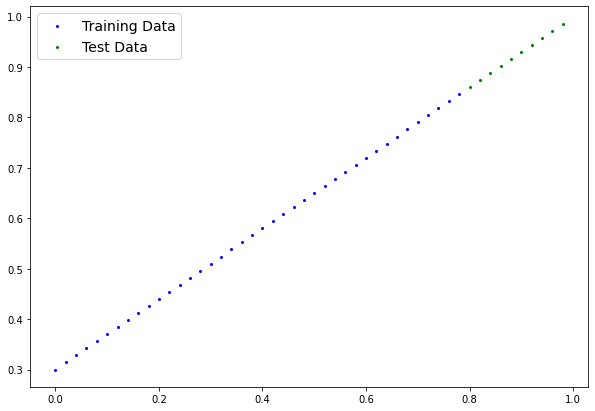

In [5]:
plot_predictions()

# 2. Build Model

In [7]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(
        1,
        requires_grad = True,
        dtype = torch.float
    ))

    self.bias = nn.Parameter(torch.randn(
        1,
        requires_grad = True,
        dtype = torch.float
    ))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias



In [8]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
# Make predictions with model
with torch.inference_mode(): 
  y_preds = model_0(X_test)

In [11]:
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Actual Values:\n{X_test}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Actual Values:
tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
        0.9800])
Predicted values:
tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])


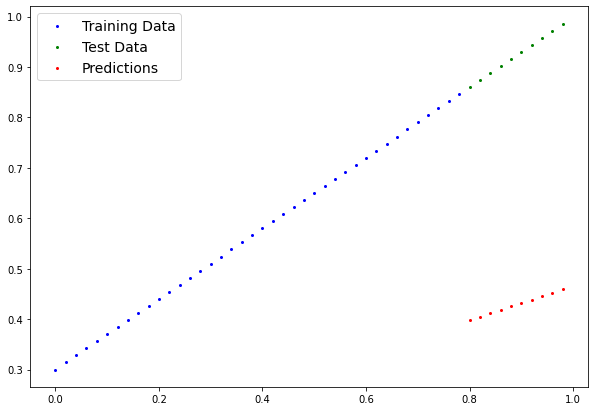

In [12]:
plot_predictions(predictions=y_preds)

# 3. Train a Model

In [13]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01)



## Creating a training Loop

In [18]:
torch.manual_seed(42)

epochs = 200

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  # Put model in train mode
  model_0.train()

  # pass training data
  y_pred = model_0(X_train)

  # calculate loss
  loss = loss_fn(y_pred, y_train.type(torch.float))

  # zero grad
  optimizer.zero_grad()

  # run loss backwards
  loss.backward()

  # step the optimizer 
  optimizer.step()

  #### Testing

  # Model in eval mode
  model_0.eval()

  # inference mode
  with torch.inference_mode():
    
    # pass test data
    test_preds = model_0(X_test)

    # calculate loss
    test_loss = loss_fn(test_preds, y_test.type(torch.float))

    # Print out what's happening
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262 
Epoch: 10 | MAE Train Loss: 0.021020207554101944 | MAE Test Loss: 0.04819049686193466 
Epoch: 20 | MAE Train Loss: 0.01758546568453312 | MAE Test Loss: 0.04060482233762741 
Epoch: 30 | MAE Train Loss: 0.014155393466353416 | MAE Test Loss: 0.03233227878808975 
Epoch: 40 | MAE Train Loss: 0.010716589167714119 | MAE Test Loss: 0.024059748277068138 
Epoch: 50 | MAE Train Loss: 0.0072835334576666355 | MAE Test Loss: 0.016474086791276932 
Epoch: 60 | MAE Train Loss: 0.0038517764769494534 | MAE Test Loss: 0.008201557211577892 
Epoch: 70 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 80 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 90 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 100 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 110 | MAE Train Loss: 0.0089

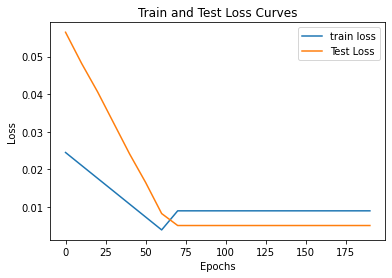

In [19]:
plt.plot(epoch_count, train_loss_values, label = "train loss")
plt.plot(epoch_count, test_loss_values, label = "Test Loss")
plt.title("Train and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [20]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


# Making predictions with trained Model

In [30]:
model_0.eval()

with torch.inference_mode():

  # model_0.to(device)
  # X_test = X_test.to(device)

  y_preds = model_0(X_test)

y_preds

tensor([0.8685, 0.8825, 0.8965, 0.9105, 0.9245, 0.9384, 0.9524, 0.9664, 0.9804,
        0.9944])

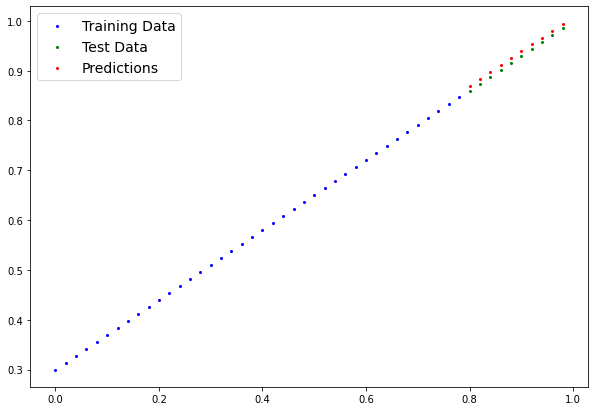

In [22]:
plot_predictions(predictions=y_preds)

# 5. Saving and Loading a PyTorch Model

In [23]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [24]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [31]:
loaded_model_0.eval()

with torch.inference_mode():

  # loaded_model_0.to(DEVICE)
  # X_test.to(DEVICE)
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([0.8685, 0.8825, 0.8965, 0.9105, 0.9245, 0.9384, 0.9524, 0.9664, 0.9804,
        0.9944])

In [32]:
y_preds == loaded_model_preds

tensor([True, True, True, True, True, True, True, True, True, True])

# 6. Putting it all together (DEVICE AGNOSTIC)

## Getting Data

In [33]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'1.12.0+cu113'

In [34]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using Device", device)

Using Device cpu


In [37]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [38]:
train_split = int(0.8 *len(X))

X_train = X[:train_split]
y_train = y[:train_split]

X_test = X[train_split:]
y_test = y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

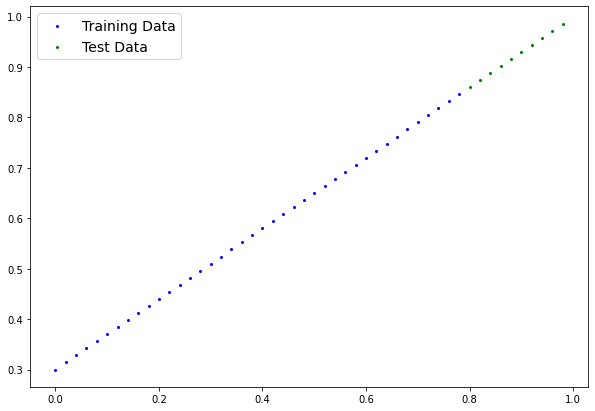

In [39]:
plot_predictions()

## Building Model

In [45]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features = 1)
    
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [46]:
next(model_1.parameters()).device

device(type='cpu')

In [47]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

## Training Loop

In [49]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [50]:
torch.manual_seed(42)

epochs= 1000
epoch_count = []
train_loss_values = []
test_loss_values = []

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

  #training mode
  model_1.train()

  # pass data
  y_preds = model_1(X_train)

  # calculate loss
  loss = loss_fn(y_preds, y_train)

  # zero grad
  optimizer.zero_grad()

  # loss backwards
  loss.backward()

  # step optimizer
  optimizer.step()

  ### Testing
  model_1.eval()

  with torch.inference_mode():
    # predict
    test_preds = model_1(X_test)

    # calculate loss
    test_loss = loss_fn(test_preds, y_test)

  if epoch % 100 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904


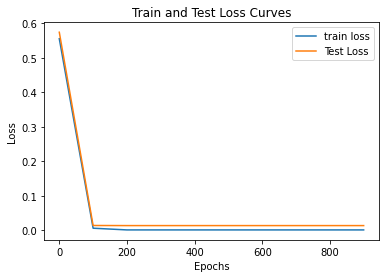

In [53]:
plt.plot(epoch_count, train_loss_values, label = "train loss")
plt.plot(epoch_count, test_loss_values, label = "Test Loss")
plt.title("Train and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [51]:
from pprint import pprint

print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


## Making Predictions

In [52]:
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

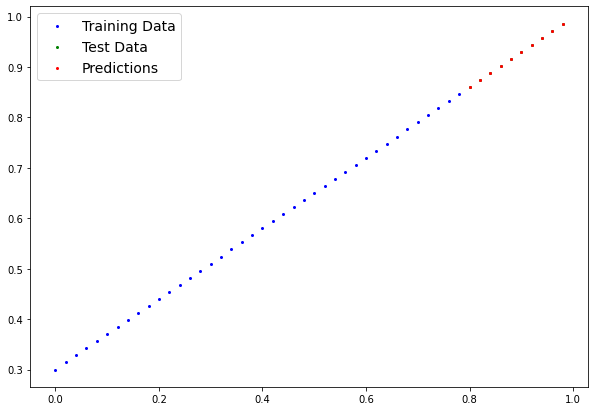

In [54]:
plot_predictions(predictions=y_preds.cpu())

## Saving and Loading Model

In [55]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_1.state_dict(),
           f = MODEL_SAVE_PATH)

In [56]:
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cpu


In [57]:
loaded_model_1.eval()

with torch.inference_mode():
  pred_loaded_model=loaded_model_1(X_test)

y_preds ==pred_loaded_model

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])